In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Примерни данни
X = [[2000,1000,500], [3000,2000,1000], [4000,2500,1500], [4500,3000,2000], [5000,3500,2500],
    [5500,4000,3000], [6000,4500,3500], [6500,5000,4000], [7000,5500,4500], [7500,6000,5000]]
Y_sales = [8000, 9500, 10500, 12000, 12500, 13500, 15000, 16000, 17000, 18000]


In [14]:
# Разделяне на данните на обучаващ и тестов набор
X_train, X_test, y_train, y_test = train_test_split(X, Y_sales, test_size=0.2, random_state=0)

# Инициализиране и обучение на модела на линейна регресия
model = LinearRegression()
model.fit(X_train, y_train)

# Извеждане на коефициентите a и b за всяка независима променлива
print('Коефициенти на модела (a):', model.coef_)
print(f'Свободен член (b): {model.intercept_:.2f}')
# Примерно уравнение на правата за телевизионна реклама:
# y = a_tv * X_tv + a_radio * X_radio + a_internet * X_internet + b
# или, ако се интересуваме само от влиянието на телевизионната реклама:

print(f'Уравнение на правата: y = {model.coef_[0]:.2f} * X_tv + {model.coef_[1]:.2f} * X_radio + {model.coef_[2]:.2f} * X_internet + {model.intercept_:.2f}')
# Оценка на модела с различни мерки
y_pred = model.predict(X_test)

# Средната стойност на продажбите
mean_sales = np.mean(Y_sales)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae_ratio = mae / mean_sales
rmse_ratio = rmse / mean_sales

print(f'Средна стойност на продажбите: {mean_sales:.4f}')
print(f'Отношение на MAE към средната стойност на продажбите: {mae_ratio:.4f}')
print(f'Отношение на RMSE към средната стойност на продажбите: {rmse_ratio:.4f}')

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

# Прогнозиране с модела
new_X = np.array([[3500, 1800, 1200]])  # нови данни за телевизия, радио и интернет реклама
prediction = model.predict(new_X)

print(f'Прогнозирани продажби за новите данни: {prediction[0]:.2f}')

Коефициенти на модела (a): [0.2 0.7 1.2]
Свободен член (b): 6300.00
Уравнение на правата: y = 0.20 * X_tv + 0.70 * X_radio + 1.20 * X_internet + 6300.00
Средна стойност на продажбите: 13200.0000
Отношение на MAE към средната стойност на продажбите: 0.0076
Отношение на RMSE към средната стойност на продажбите: 0.0085
MAE: 100.0000
RMSE: 111.8034
Прогнозирани продажби за новите данни: 9700.00


Коефициенти на модела (a): [2.18181818]
Свободен член (b): 7200.000000000002


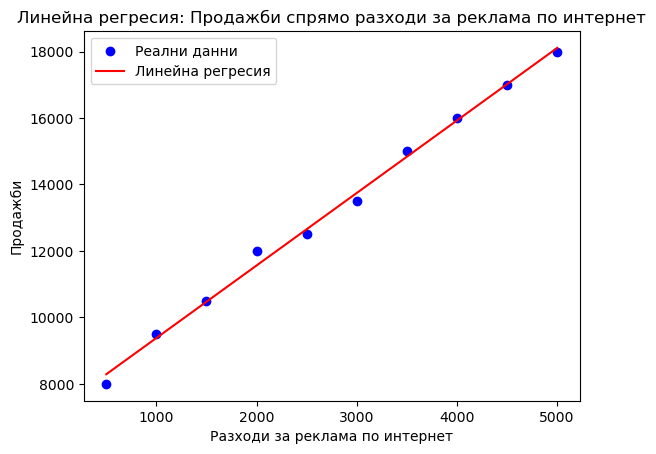

In [27]:
# Визуализация
#X_tv = np.array([2000, 3000, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500]).reshape(-1, 1)  # разходи за телевизия
X_radio = np.array([1000, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000]).reshape(-1, 1)  # разходи за радио
X_internet = np.array([500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]).reshape(-1, 1)  # разходи за интернет
# Създаване на модела и обучение
model = LinearRegression()
model.fit(X_internet, Y_sales)
# Извеждане на коефициентите a и b за всяка независима променлива
print('Коефициенти на модела (a):', model.coef_)
print('Свободен член (b):', model.intercept_)
# Предсказания
y_pred = model.predict(X_internet)

plt.scatter(X_internet, Y_sales, color='blue', label='Реални данни')
plt.plot(X_internet, y_pred, color='red', label='Линейна регресия')
plt.xlabel('Разходи за реклама по интернет')
plt.ylabel('Продажби')
plt.title('Линейна регресия: Продажби спрямо разходи за реклама по интернет')
plt.legend()
plt.show()

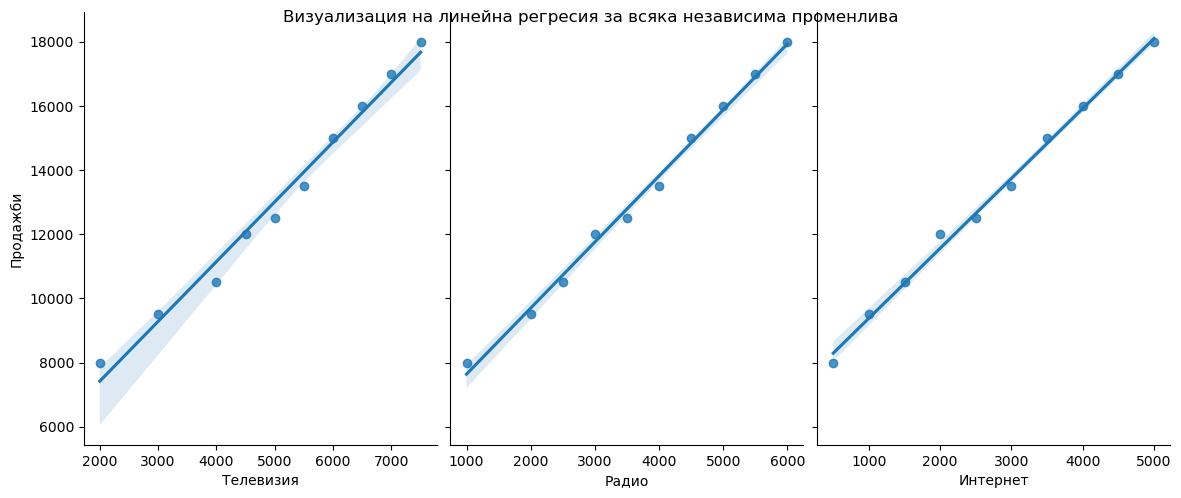

In [18]:
import pandas as pd
import seaborn as sns

# Създаване на DataFrame с примерни данни
data = {
    'Телевизия': [2000, 3000, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500],
    'Радио': [1000, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000],
    'Интернет': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
    'Продажби': [8000, 9500, 10500, 12000, 12500, 13500, 15000, 16000, 17000, 18000]
}
df = pd.DataFrame(data)

# Визуализация на зависимостите
sns.pairplot(df, x_vars=['Телевизия', 'Радио', 'Интернет'], y_vars='Продажби', height=5, aspect=0.8, kind='reg')
plt.suptitle('Визуализация на линейна регресия за всяка независима променлива')
plt.show()


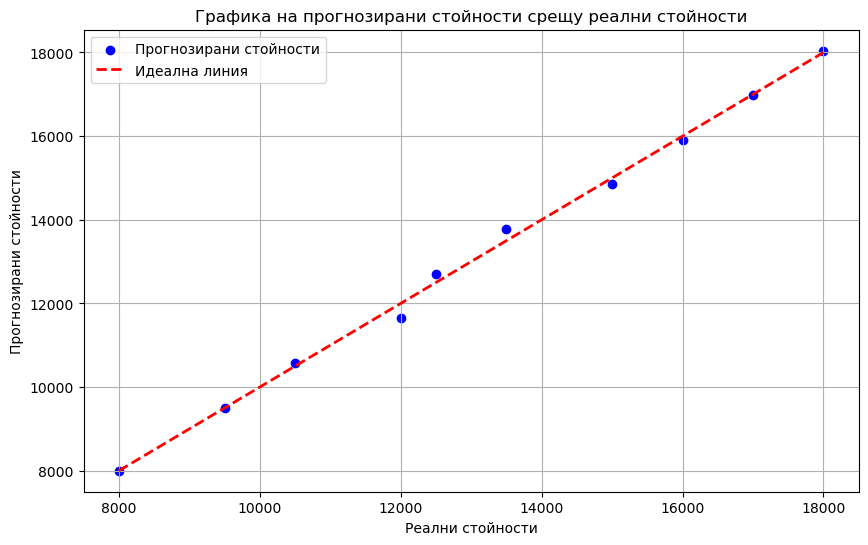

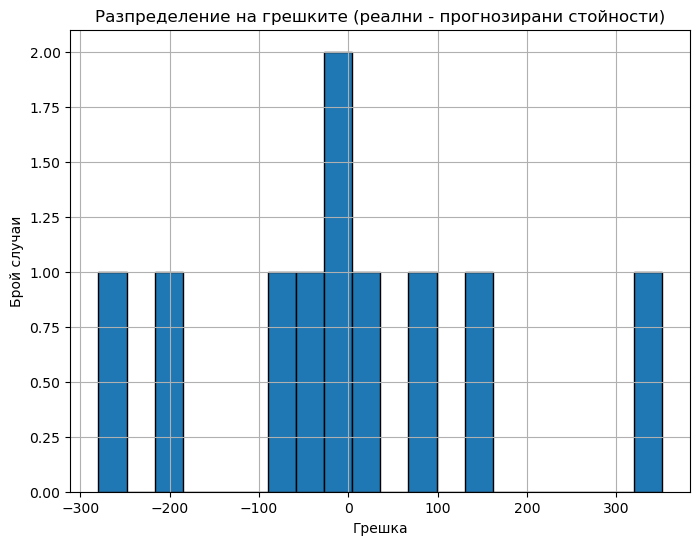

In [19]:
# Инициализиране и обучение на модела на линейна регресия
model = LinearRegression()
model.fit(X, Y_sales)

# Прогнозиране на тестовите данни
y_pred = model.predict(X)

# Визуализация на резултатите
plt.figure(figsize=(10, 6))

# Графика на прогнозирани стойности срещу реални стойности
plt.scatter(Y_sales, y_pred, color='blue', label='Прогнозирани стойности')
plt.plot([min(Y_sales), max(Y_sales)], [min(Y_sales), max(Y_sales)], color='red', linestyle='--', linewidth=2, label='Идеална линия')
plt.title('Графика на прогнозирани стойности срещу реални стойности')
plt.xlabel('Реални стойности')
plt.ylabel('Прогнозирани стойности')
plt.legend()
plt.grid(True)
plt.show()

# Графика на разпределение на грешките
plt.figure(figsize=(8, 6))
residuals = Y_sales - y_pred
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Разпределение на грешките (реални - прогнозирани стойности)')
plt.xlabel('Грешка')
plt.ylabel('Брой случаи')
plt.grid(True)
plt.show()


Коефициент a: 3.04812030075188
Константа b: 937.3308270676691
MAE: 40.657894736842174
RMSE: 45.63462278788422
Средна стойност на продажбите: 2690.0000
Отношение на MAE към средната стойност на продажбите: 0.0151
Отношение на RMSE към средната стойност на продажбите: 0.0170


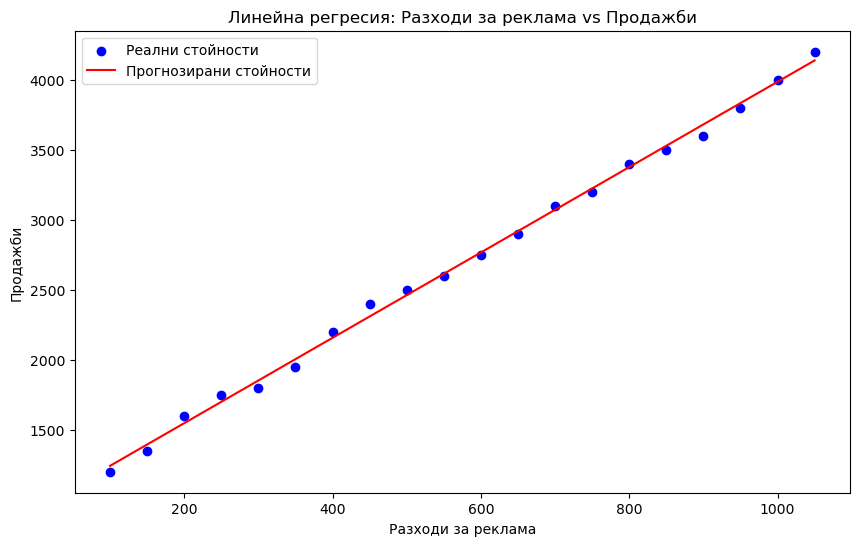

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

# Примерни данни
data = {
    'AdSpend': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050],
    'Sales': [1200, 1350, 1600, 1750, 1800, 1950, 2200, 2400, 2500, 2600, 2750, 2900, 3100, 3200, 3400, 3500, 3600, 3800, 4000, 4200]
}

# Създаване на DataFrame
df = pd.DataFrame(data)

# Променливи
X = df[['AdSpend']]  # Независима променлива (разходи за реклама)
y = df['Sales']      # Зависима променлива (продажби)

# Обучение на модела
model = LinearRegression()
model.fit(X, y)

# Коефициенти
a = model.coef_[0]
b = model.intercept_

print(f'Коефициент a: {a}')
print(f'Константа b: {b}')

# Прогнозиране
y_pred = model.predict(X)

# Оценка на модела
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mean_sales = np.mean(y)
mae_ratio = mae / mean_sales
rmse_ratio = rmse / mean_sales

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'Средна стойност на продажбите: {mean_sales:.4f}')
print(f'Отношение на MAE към средната стойност на продажбите: {mae_ratio:.4f}')
print(f'Отношение на RMSE към средната стойност на продажбите: {rmse_ratio:.4f}')

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Реални стойности')
plt.plot(X, y_pred, color='red', label='Прогнозирани стойности')
plt.xlabel('Разходи за реклама')
plt.ylabel('Продажби')
plt.title('Линейна регресия: Разходи за реклама vs Продажби')
plt.legend()
plt.show()
